# What is K-Means Clustering?

K-Means clustering is an unsuperized learning based algorithm that aims to partition a set of $n$ data points into $K$ clusters in such a way that each data point belongs to the cluster with the nearest mean (centroid). The algorithm iterates between assigning data points to clusters and updating the cluster centroids until convergence is reached.

# Steps of K-Means Clustering

### Step 1 - Initialization:
* Choose $K$ initial centroids: $ \{ \mu_1, \mu_2, \dots, \mu_K \} $

### Step 2 - Assignment:
* For each data point $x_i$, assign it to the nearest centroid: $$ c_i = \arg \min_j \| x_i - \mu_j \|^2 $$

* Here, $|| \cdot ||$ denotes the Euclidean distance, and $c_i$ is the cluster assignment for $x_i$.

### Step 3 - Update:

* Calculate the new centroids as the mean of all data points assigned to each cluster: $$ \mu_j = \frac{1}{|C_j|} \sum_{x_i \in C_j} x_i $$

* Here, $c_j$ is the set of data points assigned to cluster $j$, and $∣𝐶_j∣$
 is the number of data points in cluster $j$.

### Step 4 - Convergence Check:

* Check if the centroids have stabilized (i.e., their positions no longer change significantly): $$ \| \mu_j^{(t)} - \mu_j^{(t-1)} \| < \epsilon $$

* Here, $ϵ$ is a small threshold value, and $𝑡$ denotes the iteration number.


# Project Objective

Use the K-means clustering algorithim to classify inventory for a warehouse into 5 unique clusters.

# Data

* The data contained in "Warehouse SKU Data.csv" contains 10,000 unique SKU numbers.
* Each SKU has a product category, weight (lbs), volume (cubic ft), total picks, and a schedule that shows how many times within a hourly interval starting at 7am and ending at 8pm that the SKU was required to be picked in the warehouse during the previous business quarter.
* This schedule data contains the features that will be used to classify inventory/SKUs. The idea is that SKUs with similar pick schedules should belong to the same cluster and be stored close to other SKUs in the physical warehouse to make the picking process more efficient.



In [ ]:
import pandas as pd
data = pd.read_csv("Warehouse SKU Data.csv")
data.head(20)

,SKU,Category,Weight (lbs),Volume (cubic ft),Total Inventory Picks,7AM - 8AM,8AM - 9AM,9AM -10AM,10AM - 11AM,11AM - 12PM,12PM - 1PM,1PM - 2PM,2PM - 3PM,3PM - 4PM,4PM - 5PM,5PM - 6PM,6PM - 7PM,7PM - 8PM
0,70897,Home,26.44,17.36,121,8,9,11,10,10,16,25,17,12,3,0,0,0
1,13940,Electronics,11.10,2.57,275,112,65,46,27,19,4,2,0,0,0,0,0,0
2,44052,Hygiene,2.48,0.62,124,6,9,8,11,8,23,27,18,10,2,2,0,0
3,65796,Home,51.59,86.04,359,190,42,67,28,17,10,5,0,0,0,0,0,0
4,94236,Sports,17.96,1.58,285,167,40,55,12,7,1,3,0,0,0,0,0,0
5,39729,Office,3.20,1.68,279,5,26,44,30,17,25,25,21,24,18,16,20,8
6,69591,Clothing,0.63,6.44,196,0,0,0,0,4,6,18,39,27,32,53,11,6
7,70768,Medical,2.16,3.36,245,0,0,0,0,1,4,28,31,59,53,49,17,3
8,55894,Clothing,0.54,2.65,274,8,22,41,17,27,27,25,20,19,25,15,20,8
9,95487,Office,4.19,5.85,222,0,0,0,0,3,8,30,34,25,47,60,14,1


In [ ]:
# Select columns 3 (4th column) to 16 (17th column) using iloc
selected_features = data.iloc[:, 5:18]
selected_features.head(20)


,7AM - 8AM,8AM - 9AM,9AM -10AM,10AM - 11AM,11AM - 12PM,12PM - 1PM,1PM - 2PM,2PM - 3PM,3PM - 4PM,4PM - 5PM,5PM - 6PM,6PM - 7PM,7PM - 8PM
0,8,9,11,10,10,16,25,17,12,3,0,0,0
1,112,65,46,27,19,4,2,0,0,0,0,0,0
2,6,9,8,11,8,23,27,18,10,2,2,0,0
3,190,42,67,28,17,10,5,0,0,0,0,0,0
4,167,40,55,12,7,1,3,0,0,0,0,0,0
5,5,26,44,30,17,25,25,21,24,18,16,20,8
6,0,0,0,0,4,6,18,39,27,32,53,11,6
7,0,0,0,0,1,4,28,31,59,53,49,17,3
8,8,22,41,17,27,27,25,20,19,25,15,20,8
9,0,0,0,0,3,8,30,34,25,47,60,14,1


Cluster
2    2037
4    2036
3    2018
1    1976
5    1933
Name: count, dtype: int64


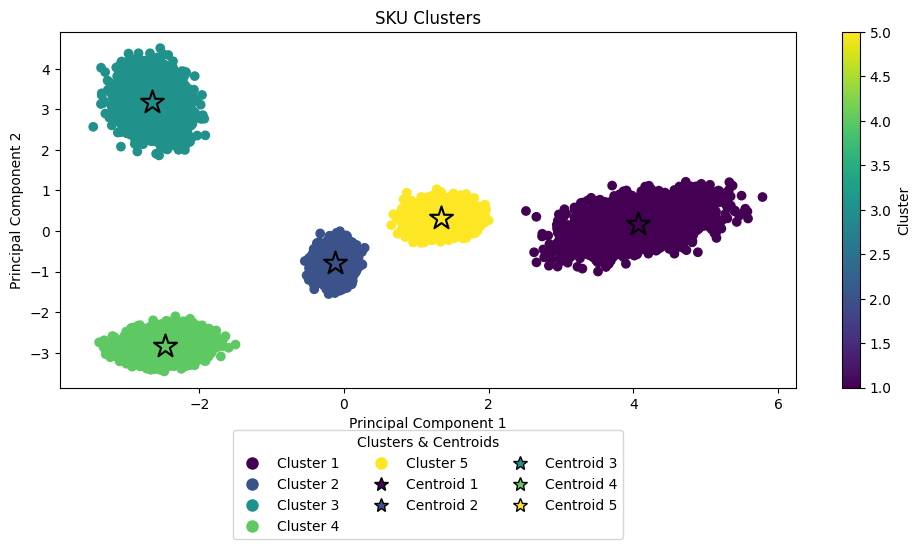

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Standardize the selected features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

# Implement K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_features)

# Add cluster labels to the original dataset and adjust cluster numbers to start at 1
data['Cluster'] = kmeans.labels_ + 1
print(data['Cluster'].value_counts())

# Evaluate and visualize clusters
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Generate cluster colors
cluster_colors = plt.cm.viridis(np.linspace(0, 1, len(np.unique(data['Cluster']))))

plt.figure(figsize=(10, 6))
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=data['Cluster'], cmap='viridis')

# Plot the centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)
for i, color in enumerate(cluster_colors):
    plt.scatter(centroids_pca[i, 0], centroids_pca[i, 1], marker='*', s=300, color=color,
                edgecolor='black', linewidth=1.5, label=f'Centroid {i+1}')

plt.title('SKU Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Create a custom legend
cluster_ids = np.unique(data['Cluster'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster_id}',
                          markerfacecolor=color, markersize=10) for cluster_id, color in zip(cluster_ids, cluster_colors)]
# Add centroids to the legend
legend_elements.extend([Line2D([0], [0], marker='*', color='w', label=f'Centroid {i+1}',
                               markerfacecolor=color, markeredgecolor='black', markersize=10) for i, color in enumerate(cluster_colors)])

# Place the legend below the plot
plt.legend(handles=legend_elements, title="Clusters & Centroids", loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.colorbar(scatter, label='Cluster')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the legend comfortably
plt.show()






In [ ]:
# Export the DataFrame 'data' to a CSV file
data.to_csv('clustered_data.csv', index=False)
